In [1]:
list_pkgs <- c("plyr", "dplyr", "tidyr", "readr", "car", "lme4", "lmerTest", "ggplot2", "cowplot")
new_pkgs <- list_pkgs[!(list_pkgs %in% installed.packages()[,"Package"])]
if(length(new_pkgs) > 0){ install.packages(new_pkgs) }

library(plyr)
library(dplyr)
library(tidyr)
library(readr)
library(car)
library(lme4)
library(lmerTest)
library(ggplot2)
library(cowplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



# Outline

Move on to an F3 population and look at the importance of population stratification.

An F3 is created by random mating of F2 individuals.  F2 individuals are genetically different from each other, so the F3 generation typically has family structure (sets of siblings sharing the same parents).  This phenomenon is generally called population stratification.  It is important because individuals with correlated phenotypes have correlated genotypes due to relatedness.  Treating them as independent leads to a form of pseudoreplication. 
 
We can start by running the null model for a set of simulated markers to see how the analysis performs with a true null hypothesis. Do we get the right number of false positives?  

We can also try to run this model by randomizing either genotypes and phenotypes, while ignoring the structure of the population (so we ignore family).  Do we get the same significance results?  

We can account for the influence of population stratification by including a random effect term that accounts for family.  This is basically the same as running the variance component model, so we are fitting the family variance component as a random effect while fitting the fixed effect of a locus. This same approach could be done in a more complex population by using an animal model to fit the family variance component. 

We can now go back and run the null model with simulated markers and look at how including the family covariance parameter changes the behaviour of the model.
 
We can also use this mixed model to simultaneously estimate QTL effects and family variance components, which is a simple version of the structure of a model that is now widely used for mapping loci in natural populations (including for human association studies)

We can also look at whether a locus is pleiotropic and affects multiple traits.

# Population stratification

An F3 population has more recombination, which means you get higher resolution, but your model is more complex

![](f3pop.png)

# Reading and plotting data

In [2]:
f3_data = read_csv("./F3 geno pheno with QTL effect.csv")
f3_data

ID,FAMILY,Sex,Sire,Dam,NURSE,LSB,LSW,Trait1,Trait2,⋯,G25,G26,G27,G28,G29,G30,G31,Trait2a,Trait3a,Trait3b
492,11,F,82,173,173,8,8,0.08732662,12.511166,⋯,1,1,1,1,1,1,1,12.004366,25.99122,26.66904
493,11,F,82,173,173,8,8,0.09732662,10.522276,⋯,1,1,1,1,1,1,1,10.522276,22.88304,22.88304
494,14,F,85,114,173,7,8,0.09371156,13.818946,⋯,-1,-1,-1,-1,-1,-1,-1,13.312146,26.25022,27.42804
495,14,M,85,114,173,7,8,0.15897373,12.384913,⋯,0,0,0,0,0,1,1,12.891713,30.75996,30.75996
496,11,F,82,173,173,8,8,0.02587000,13.101166,⋯,1,1,1,1,1,1,1,13.607966,31.49486,30.31704
497,14,M,85,114,173,7,8,0.12987749,13.744913,⋯,-1,-1,-1,-1,-1,-1,-1,13.238113,33.92932,35.10714
498,14,M,85,114,173,7,8,0.10240803,13.376023,⋯,-1,-1,0,0,0,0,0,12.869223,33.27632,34.45414
499,11,F,82,173,173,8,8,0.09491825,13.953386,⋯,-1,-1,-1,-1,-1,0,0,13.446586,28.12822,29.30604
500,11,F,82,173,114,8,7,0.09938281,10.617069,⋯,-1,-1,-1,-1,-1,0,0,10.110269,28.59073,29.76855
501,11,M,82,173,114,8,7,0.09229518,10.383046,⋯,0,0,0,0,0,0,0,10.383046,28.14965,28.14965


Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

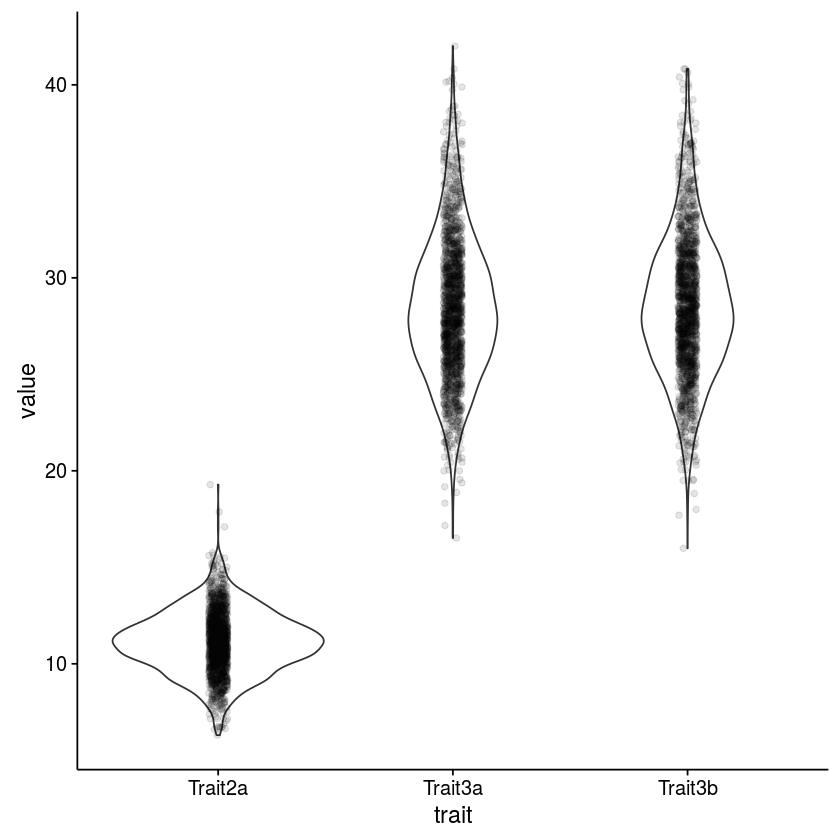

In [3]:
f3_data %>% 
    gather(trait, value, Trait2a:Trait3b) %>%
    ggplot(aes(trait, value)) + geom_violin() + geom_jitter(width = 0.1, alpha = 0.1)

# Mapping gone wrong

Let's see what happens when we use the same model as in the F2 population, using the set of null markers with no effect. 

Remeber, we expect no more than 5% of significant markers in this set.

In [4]:
simulated_genotypes = read_csv("sim genotypes.csv")
f3_data_null = inner_join(select(f3_data, ID:Trait3), simulated_genotypes, by = "ID")
#f3_data_null

In [5]:
n_markers = 675
null_marker_fits_trait3 = list()
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    f3_data_null[[paste0(current_marker, '_D')]] = ifelse(f3_data_null[[current_marker]], 0, 1)
    model_formula = paste0("Trait3 ~ Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    null_marker_fits_trait3[[i]] = lm(as.formula(model_formula), data = f3_data_null)
}

In [6]:
table(laply(null_marker_fits_trait3, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) < 0.05) / n_markers


    FALSE      TRUE 
0.8059259 0.1940741 

Almost four times what we should be getting!

## Mixed models for stratification

We can take stratification into account using a random effect for family structure. The lme4 and lmerTest packages allow us to fit the model and extract the relevant p-value. The only difference is the (1|FAMILY) term in the model formula.

In [7]:
n_markers = 675
null_marker_mixed_fits_trait3 = list()
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    f3_data_null[[paste0(current_marker, '_D')]] = ifelse(f3_data_null[[current_marker]], 0, 1)  
    model_formula = paste0("Trait3 ~ (1|FAMILY) + Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    null_marker_mixed_fits_trait3[[i]] = lmer(as.formula(model_formula), data = f3_data_null)
}

In [8]:
table(laply(null_marker_mixed_fits_trait3, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) < 0.05) / n_markers


     FALSE       TRUE 
0.94222222 0.05777778 

Much better!

## Mapping pleiotropic QTLs

For more than 1 trait we can fit the models separetly for each trait or run them in a single model.

In [9]:
n_markers = 31
interval = 6 # Play around with this value. 
fl_marker_fits_trait2a = list()
for(i in seq(n_markers)) f3_data[[paste0(paste0('G', i), '_D')]] = ifelse(f3_data[[paste0('G', i)]], 0, 1)
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    model_formula = paste0("Trait2a ~ (1|FAMILY) + Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    if((i - interval) >= 1)
        model_formula = paste0(model_formula, "+ G", paste0(i - interval), "+ G", paste0(i - interval), "_D")
    if((i + interval) <= n_markers)
        model_formula = paste0(model_formula, "+ G", paste0(i + interval), "+ G", paste0(i + interval), "_D")
    fl_marker_fits_trait2a[[i]] = lmer(as.formula(model_formula), data = f3_data)
}

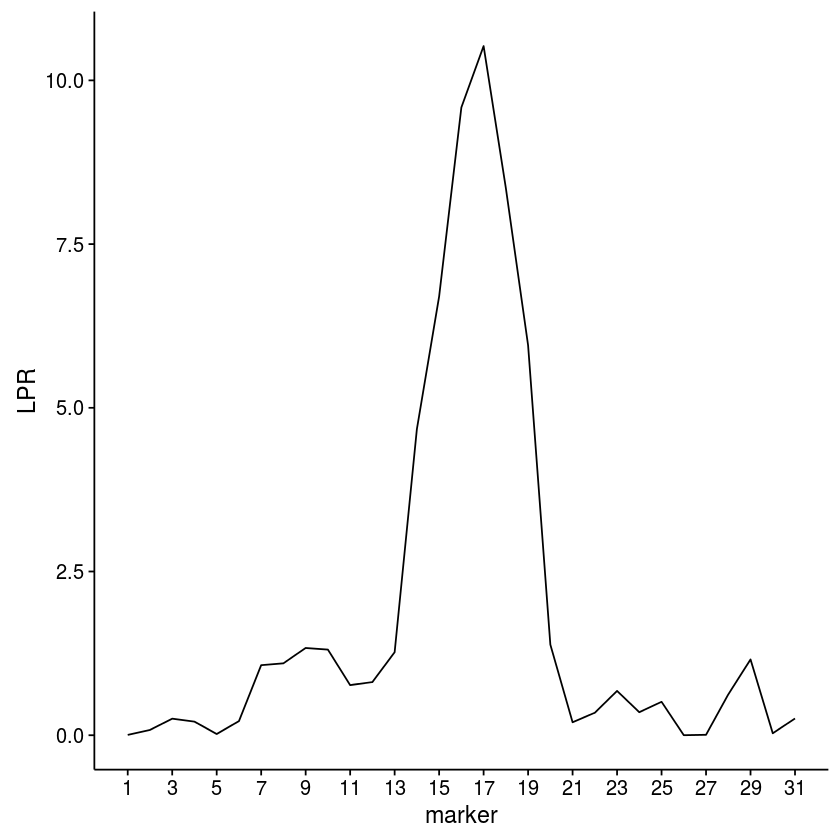

In [10]:
ldply(fl_marker_fits_trait2a, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) %>%
    ggplot(aes(1:n_markers, -log10(V1))) + geom_line() + labs(x = "marker", y = "LPR") +
    scale_x_continuous(breaks = seq(1, n_markers, by = 2))

In [11]:
n_markers = 31
interval = 6 # Play around with this value. 
fl_marker_fits_trait3a = list()
for(i in seq(n_markers)){
    current_marker = paste0('G', i)
    model_formula = paste0("Trait3a ~ (1|FAMILY) + Sex + LSB + LSW + ", current_marker, "+", current_marker, "_D")
    if((i - interval) >= 1)
        model_formula = paste0(model_formula, "+ G", paste0(i - interval), "+ G", paste0(i - interval), "_D")
    if((i + interval) <= n_markers)
        model_formula = paste0(model_formula, "+ G", paste0(i + interval), "+ G", paste0(i + interval), "_D")
    fl_marker_fits_trait3a[[i]] = lmer(as.formula(model_formula), data = f3_data)
}

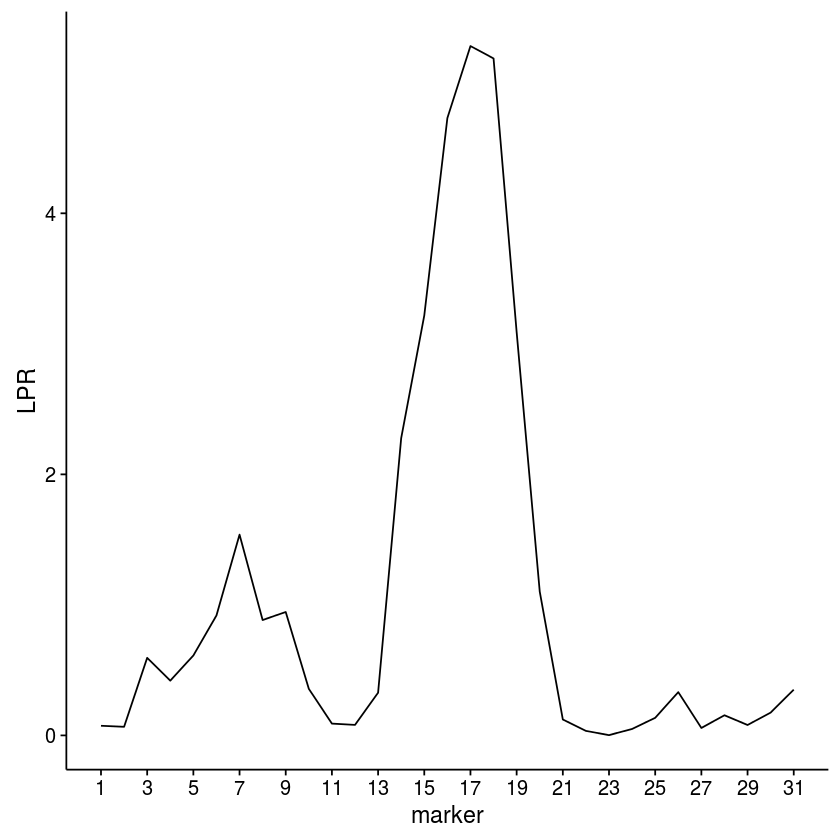

In [12]:
ldply(fl_marker_fits_trait3a, function(x) summary(x)$coefficients[5, 'Pr(>|t|)']) %>%
    ggplot(aes(1:n_markers, -log10(V1))) + geom_line() + labs(x = "marker", y = "LPR") +
    scale_x_continuous(breaks = seq(1, n_markers, by = 2))

## Multiple traits at the same time

It's also possible to run both traits at the same time and get an estimate for the significance of the marker for all traits. This is more complicated, so we'll do it for a single marker which we already know there is an effect.

First we need to get the data in the apropriate "narrow" format, with a single column for the value of the traits and a column for the trait identity:

In [13]:
narrow_f3_data = gather(f3_data, variable, value, Trait2a, Trait3a)
narrow_f3_data

ID,FAMILY,Sex,Sire,Dam,NURSE,LSB,LSW,Trait1,Trait2,⋯,G24_D,G25_D,G26_D,G27_D,G28_D,G29_D,G30_D,G31_D,variable,value
492,11,F,82,173,173,8,8,0.08732662,12.511166,⋯,1,0,0,0,0,0,0,0,Trait2a,12.004366
493,11,F,82,173,173,8,8,0.09732662,10.522276,⋯,0,0,0,0,0,0,0,0,Trait2a,10.522276
494,14,F,85,114,173,7,8,0.09371156,13.818946,⋯,0,0,0,0,0,0,0,0,Trait2a,13.312146
495,14,M,85,114,173,7,8,0.15897373,12.384913,⋯,1,1,1,1,1,1,0,0,Trait2a,12.891713
496,11,F,82,173,173,8,8,0.02587000,13.101166,⋯,0,0,0,0,0,0,0,0,Trait2a,13.607966
497,14,M,85,114,173,7,8,0.12987749,13.744913,⋯,0,0,0,0,0,0,0,0,Trait2a,13.238113
498,14,M,85,114,173,7,8,0.10240803,13.376023,⋯,0,0,0,1,1,1,1,1,Trait2a,12.869223
499,11,F,82,173,173,8,8,0.09491825,13.953386,⋯,0,0,0,0,0,0,1,1,Trait2a,13.446586
500,11,F,82,173,114,8,7,0.09938281,10.617069,⋯,0,0,0,0,0,0,1,1,Trait2a,10.110269
501,11,M,82,173,114,8,7,0.09229518,10.383046,⋯,1,1,1,1,1,1,1,1,Trait2a,10.383046


Now we set up a mixed model with a (variable|FAMILY) mixed effect, which will fit a genetic covariance matrix between the 2 traits.

In [14]:
null_2trait_fit = lmer(value ~ (variable|FAMILY) + variable + variable:Sex + variable:LSB + variable:LSW, data = narrow_f3_data)
summary(null_2trait_fit)

Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: 
value ~ (variable | FAMILY) + variable + variable:Sex + variable:LSB +  
    variable:LSW
   Data: narrow_f3_data

REML criterion at convergence: 14603

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0311 -0.5061  0.0140  0.5120  3.8385 

Random effects:
 Groups   Name            Variance Std.Dev. Corr
 FAMILY   (Intercept)     0.8789   0.9375       
          variableTrait3a 3.1997   1.7888   0.56
 Residual                 4.9383   2.2222       
Number of obs: 3164, groups:  FAMILY, 198

Fixed effects:
                       Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)            11.28022    0.36220  315.50000  31.143  < 2e-16 ***
variableTrait3a        16.47386    0.59643  289.00000  27.621  < 2e-16 ***
variableTrait2a:SexM   -0.02885    0.11472 2948.80000  -0.251  0.80145    
variableTrait3a:SexM    0.35535    0.11867 2874.60000   2.9

Now we add the marker term to this model

In [15]:
marker17_2trait_fit = update(null_2trait_fit, . ~ . + variable:G17 + variable:G17_D)
summary(marker17_2trait_fit)

Linear mixed model fit by REML ['lmerMod']
Formula: 
value ~ (variable | FAMILY) + variable + variable:Sex + variable:LSB +  
    variable:LSW + variable:G17 + variable:G17_D
   Data: narrow_f3_data

REML criterion at convergence: 14468.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8006 -0.4938  0.0186  0.5035  4.2250 

Random effects:
 Groups   Name            Variance Std.Dev. Corr
 FAMILY   (Intercept)     0.8748   0.9353       
          variableTrait3a 3.1755   1.7820   0.51
 Residual                 4.7047   2.1690       
Number of obs: 3164, groups:  FAMILY, 198

Fixed effects:
                      Estimate Std. Error t value
(Intercept)           11.24523    0.36124  31.129
variableTrait3a       16.49093    0.59445  27.741
variableTrait2a:SexM  -0.05688    0.11232  -0.506
variableTrait3a:SexM   0.30881    0.11602   2.662
variableTrait2a:LSB   -0.07765    0.04490  -1.729
variableTrait3a:LSB    0.02412    0.07942   0.304
variableTrait2a:LSW    0.06532    0.03

Now we can compare the two models (with and without the marker) using a  likelihood ratio test. 
As expected the marker term is highly significant.

In [16]:
anova(null_2trait_fit, marker17_2trait_fit)

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
object,12,14599.81,14672.53,-7287.906,14575.81,NA,NA,NA
..1,16,14462.14,14559.10,-7215.072,14430.14,145.6686,4,1.724715e-30


We can also extract the vectors of additive and dominance effects.

In [17]:
additive = summary(marker17_2trait_fit)$coefficients[9:10, 1]
dominance = summary(marker17_2trait_fit)$coefficients[11:12, 1]
additive
dominance

variableTrait2a:G17 variableTrait3a:G17 
          0.5011156           0.9704122

variableTrait2a:G17_D variableTrait3a:G17_D 
           0.10427770            0.03603775